In [5]:
# Imports
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from Bio import SeqIO

In [2]:
#simlord라는 TOOL 이용해서 fasta -> fastq 변환
#이후 vectorize하여 값을 txt로 저장
!simlord --no-sam -rr vv.fa -n 200 -mr 1500 vv
!./vectorize ./vv.fastq 4 8 100 > ./vv.txt


!simlord --no-sam -rr host_tr.fa -n 200 -mr 1500 host_tr
!./vectorize ./host_tr.fastq 4 8 100 > ./host_tr.txt

!simlord --no-sam -rr virus_tr.fa -n 100 -mr 1500 virus_tr
!./vectorize ./virus_tr.fastq 4 8 100 > ./virus_tr.txt

!simlord --no-sam -rr tt.fa -n 770 -mr 1500 tt
!./vectorize ./tt.fastq 4 8 100 > ./tt.txt

Time for reading/generating the reference: 0:00:00.000896 h
Time for simulation of 200 reads: 0:00:00.454807 h.
Time for reading/generating the reference: 0:00:00.014411 h
Time for simulation of 200 reads: 0:00:00.482057 h.
Time for reading/generating the reference: 0:00:00.015355 h
Time for simulation of 100 reads: 0:00:00.633639 h.
Time for reading/generating the reference: 0:00:00.138621 h
Time for simulation of 770 reads: 0:00:04.924494 h.


In [6]:
# 데이터
records = list(SeqIO.parse("virus_tr.fastq", "fastq"))
vv = np.loadtxt("vv.txt")
sa = np.loadtxt("SA.txt")
pa = np.loadtxt("PA.txt")
vi = np.loadtxt("virus_tr.txt")
ho = np.loadtxt("host_tr.txt")
print(vi.shape)
print(vi)
print(records.des)

(100, 136)
[[0.0326883  0.00218651 0.00426369 ... 0.0120258  0.00568492 0.00229583]
 [0.0433027  0.00179493 0.00493606 ... 0.0123401  0.00314113 0.        ]
 [0.0108647  0.00773925 0.00372079 ... 0.0102694  0.0093764  0.00550677]
 ...
 [0.0171096  0.00348837 0.00448505 ... 0.0114618  0.00647841 0.00398671]
 [0.0581651  0.00131694 0.0048288  ... 0.00790167 0.00417032 0.        ]
 [0.0106758  0.00399183 0.00519866 ... 0.0126253  0.00677683 0.00120683]]


In [4]:
# 라벨링
data = np.append(vi,vi ,axis=0)
labels  = ["vi" for x in range(100)]
labels  += ["vi_copy" for x in range(100)]
labels = np.array(labels)


(200, 2)


/Users/suhyeonglee/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


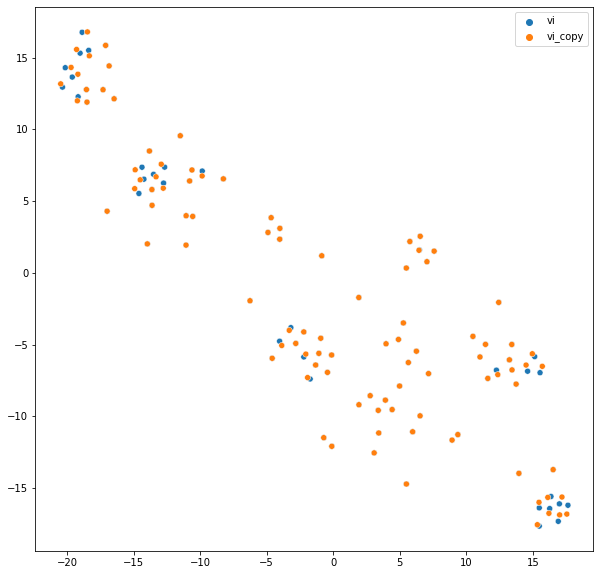

In [5]:
#T-SNE 시각화
tsne = TSNE(n_components=2)
data_2d = tsne.fit_transform(data)
print(data_2d.shape)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data_2d[:,0], data_2d[:,1], hue=labels)
plt.savefig("PCA.png")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
from Bio import SeqIO
X = vi# shape=(100, 136)
m=X.shape[0] # 집합 개수 (m=100)
n=X.shape[1] # 특징 개수 (n=136)
K=3 # 클러스터 개수
n_iter=100 # 반복 횟수
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
for i in range(K): 
    rand=rd.randint(0,m-1) # 0과 99 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(136, 3)


array([[0.00201816, 0.0135533 , 0.0166644 ],
       [0.0118567 , 0.00569633, 0.00551001],
       [0.00315338, 0.00608918, 0.0071227 ],
       [0.00807265, 0.0102141 , 0.00873539],
       [0.00264884, 0.0086427 , 0.0114232 ],
       [0.00378406, 0.0115891 , 0.0133047 ],
       [0.00908174, 0.00216068, 0.00201586],
       [0.00163976, 0.00982125, 0.0133047 ],
       [0.00063068, 0.        , 0.00040317],
       [0.00416246, 0.0054999 , 0.00483806],
       [0.00176589, 0.0117855 , 0.0118264 ],
       [0.00567608, 0.0047142 , 0.00537562],
       [0.00391019, 0.0108034 , 0.00954173],
       [0.00630676, 0.00137498, 0.00107512],
       [0.00744198, 0.0070713 , 0.00766026],
       [0.00618063, 0.00805343, 0.00671953],
       [0.00239657, 0.00608918, 0.0108856 ],
       [0.0141271 , 0.00510705, 0.00349415],
       [0.00946014, 0.0070713 , 0.00954173],
       [0.00100908, 0.00648203, 0.00551001],
       [0.0021443 , 0.014339  , 0.01102   ],
       [0.0127397 , 0.0047142 , 0.00631636],
       [0.

In [7]:
Output={} # 출력값 초기화(딕셔너리)
# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance # shape=(100, 0)
Centroids[:,0] # shape=(136,)
# (100, 136) 행렬 A에서 (136,) 벡터 값을 차감하면, 벡터 값은 (100, 136) 행렬로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist # shape=(100,)

array([0.006079  , 0.01567749, 0.00729381, 0.00661151, 0.00010304,
       0.00622985, 0.        , 0.01152322, 0.00517037, 0.00599872,
       0.0200808 , 0.00631953, 0.00991153, 0.01749841, 0.01073203,
       0.00583112, 0.02086463, 0.00640654, 0.01016745, 0.01109086,
       0.00637373, 0.00232697, 0.00636431, 0.01138591, 0.00472196,
       0.00636731, 0.00031852, 0.00554274, 0.0062731 , 0.02462917,
       0.00127782, 0.00512526, 0.01152749, 0.00578752, 0.00598933,
       0.00540974, 0.00574153, 0.01606799, 0.00534716, 0.0116235 ,
       0.00514789, 0.01601062, 0.00861139, 0.00653735, 0.00014431,
       0.00678563, 0.01140139, 0.00547981, 0.01832159, 0.00856146,
       0.00758523, 0.00567359, 0.00679254, 0.00545298, 0.00459589,
       0.00551834, 0.01611035, 0.00491898, 0.00573912, 0.01163808,
       0.00640819, 0.01006813, 0.00890346, 0.00958275, 0.00666698,
       0.00687622, 0.02093858, 0.01081397, 0.00599716, 0.01136796,
       0.00688426, 0.00700375, 0.01137998, 0.00495205, 0.01087

In [8]:
np.c_[EuclidianDistance,tempDist] # (100, 0) 행렬에 (100,) 옆으로 붙이기

array([[0.006079  ],
       [0.01567749],
       [0.00729381],
       [0.00661151],
       [0.00010304],
       [0.00622985],
       [0.        ],
       [0.01152322],
       [0.00517037],
       [0.00599872],
       [0.0200808 ],
       [0.00631953],
       [0.00991153],
       [0.01749841],
       [0.01073203],
       [0.00583112],
       [0.02086463],
       [0.00640654],
       [0.01016745],
       [0.01109086],
       [0.00637373],
       [0.00232697],
       [0.00636431],
       [0.01138591],
       [0.00472196],
       [0.00636731],
       [0.00031852],
       [0.00554274],
       [0.0062731 ],
       [0.02462917],
       [0.00127782],
       [0.00512526],
       [0.01152749],
       [0.00578752],
       [0.00598933],
       [0.00540974],
       [0.00574153],
       [0.01606799],
       [0.00534716],
       [0.0116235 ],
       [0.00514789],
       [0.01601062],
       [0.00861139],
       [0.00653735],
       [0.00014431],
       [0.00678563],
       [0.01140139],
       [0.005

In [9]:
for k in range(K): 
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance # shape=(100, 3)

array([[0.006079  , 0.00143815, 0.00104971],
       [0.01567749, 0.00421005, 0.00381141],
       [0.00729381, 0.00071594, 0.00074441],
       [0.00661151, 0.00108405, 0.00094332],
       [0.00010304, 0.00586996, 0.00634925],
       [0.00622985, 0.00069558, 0.00026675],
       [0.        , 0.00598933, 0.00631953],
       [0.01152322, 0.00278034, 0.00232464],
       [0.00517037, 0.0008308 , 0.00078058],
       [0.00599872, 0.00062505, 0.00088926],
       [0.0200808 , 0.00717741, 0.00670307],
       [0.00631953, 0.00071555, 0.        ],
       [0.00991153, 0.00158262, 0.00113434],
       [0.01749841, 0.00558287, 0.00499972],
       [0.01073203, 0.00183489, 0.00133014],
       [0.00583112, 0.0006409 , 0.00063003],
       [0.02086463, 0.00767093, 0.00701075],
       [0.00640654, 0.00070412, 0.00054843],
       [0.01016745, 0.00158652, 0.0010885 ],
       [0.01109086, 0.00207034, 0.00144542],
       [0.00637373, 0.00045431, 0.00058078],
       [0.00232697, 0.00282908, 0.00259037],
       [0.

In [10]:
# 유클리드 거리가 최소가 되는 인덱스
np.argmin(EuclidianDistance,axis=1)

array([2, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2])

In [11]:
# 0부터 시작하므로 보기 편하기 위해 1을 더해서 만들어줌 ( 성능에 의미는 없음 편하게 그냥 만들어봄 )
C=np.argmin(EuclidianDistance,axis=1)+1 
C # shape=(100,)

array([3, 3, 2, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       3, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3])

In [12]:
Y={}
for k in range(K): 
    Y[k+1]=np.array([]).reshape(136,0) # 특징 개수
Y

{1: array([], shape=(136, 0), dtype=float64),
 2: array([], shape=(136, 0), dtype=float64),
 3: array([], shape=(136, 0), dtype=float64)}

In [13]:
# 출력값 임시 딕셔너리 갱신
Y[C[0]]=np.c_[Y[C[0]],X[0]] # C[0] 키 값에 대한 재귀적 갱신
Y[C[0]]

array([[0.0219157 ],
       [0.00510108],
       [0.00245607],
       [0.00887965],
       [0.0100132 ],
       [0.0154922 ],
       [0.00094464],
       [0.0109579 ],
       [0.00037786],
       [0.00793501],
       [0.0141697 ],
       [0.00566786],
       [0.0098243 ],
       [0.0113357 ],
       [0.0107689 ],
       [0.00812394],
       [0.00604572],
       [0.00623465],
       [0.00717929],
       [0.00510108],
       [0.00887965],
       [0.00642358],
       [0.0156811 ],
       [0.00812394],
       [0.00377858],
       [0.00963537],
       [0.00755715],
       [0.0175704 ],
       [0.00642358],
       [0.0113357 ],
       [0.00661251],
       [0.00585679],
       [0.0100132 ],
       [0.00736822],
       [0.00963537],
       [0.00340072],
       [0.00510108],
       [0.00434536],
       [0.0100132 ],
       [0.0100132 ],
       [0.00906858],
       [0.00547893],
       [0.00699036],
       [0.00340072],
       [0.00812394],
       [0.002645  ],
       [0.00850179],
       [0.003

In [14]:
# 모든 데이터에 대해 반복
for i in range(m): # m=100
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y


{1: array([[0.00145894, 0.00201816, 0.00810811, ..., 0.016269  , 0.00243375,
         0.00190876],
        [0.0126094 , 0.0118567 , 0.00756757, ..., 0.00596529, 0.0127096 ,
         0.0127887 ],
        [0.00250104, 0.00315338, 0.00486486, ..., 0.0032538 , 0.00594916,
         0.00391296],
        ...,
        [0.00979575, 0.00782038, 0.0102703 , ..., 0.00921909, 0.00919416,
         0.00725329],
        [0.00218841, 0.00277497, 0.00513514, ..., 0.00298265, 0.00351541,
         0.00372208],
        [0.00937891, 0.00971241, 0.00513514, ..., 0.00406725, 0.0135208 ,
         0.00944837]]),
 2: array([[0.0134258 , 0.00843882, 0.0154008 , ..., 0.0189883 , 0.018482  ,
         0.0088286 ],
        [0.00537033, 0.00681597, 0.00478286, ..., 0.00420233, 0.00412797,
         0.0088286 ],
        [0.0024614 , 0.00681597, 0.0053568 , ..., 0.00521401, 0.00581668,
         0.00279931],
        ...,
        [0.0136496 , 0.00876339, 0.0106179 , ..., 0.0115175 , 0.0100385 ,
         0.00925926],
      

In [15]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # shape=(100,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(100, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(100,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(136,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(vi, ho) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y
    



In [16]:
#각 cluster마다 크기
print(Output[1].shape)
print(Output[2].shape)
print(Output[3].shape)
print(vi[0])
print(Output[1][0])
cnt=0

#vi의 어떤 contig가 어디로 분류되었는지
for k in range(1,4): 
    print("Clustering",k,"개수 ",len(Output[k]))
    for i in range(len(Output[k])): 
        
        for a in range(100):

            if np.array_equal(vi[a],Output[k][i]) == True:

                print("vi[",a,"] == Output[",k ,"][", i,"]")
                cnt+=1
print(cnt)



(9, 136)
(60, 136)
(31, 136)
[0.0219157  0.00510108 0.00245607 0.00887965 0.0100132  0.0154922
 0.00094464 0.0109579  0.00037786 0.00793501 0.0141697  0.00566786
 0.0098243  0.0113357  0.0107689  0.00812394 0.00604572 0.00623465
 0.00717929 0.00510108 0.00887965 0.00642358 0.0156811  0.00812394
 0.00377858 0.00963537 0.00755715 0.0175704  0.00642358 0.0113357
 0.00661251 0.00585679 0.0100132  0.00736822 0.00963537 0.00340072
 0.00510108 0.00434536 0.0100132  0.0100132  0.00906858 0.00547893
 0.00699036 0.00340072 0.00812394 0.002645   0.00850179 0.00321179
 0.00547893 0.00434536 0.0013225  0.00869072 0.00529001 0.0117136
 0.0119025  0.0107689  0.00604572 0.00491215 0.002645   0.00566786
 0.00623465 0.00529001 0.00510108 0.00529001 0.00453429 0.0115247
 0.00736822 0.0100132  0.00510108 0.0039675  0.00850179 0.00283393
 0.00887965 0.00113357 0.00434536 0.00944644 0.00925751 0.002645
 0.00226715 0.00302286 0.00491215 0.00680144 0.00717929 0.0168147
 0.00302286 0.00680144 0.00925751 0.0034

In [17]:
records = list(SeqIO.parse("virus_tr.fastq", "fastq"))
for k in range(1,4): 
    print("Clustering",k,"개수 ",len(Output[k]))
    for i in range(len(Output[k])): 
        
        for a in range(100):

            if np.array_equal(vi[a],Output[k][i]) == True:

                print("Output[",k ,"][", i,"] == ",records[a].description.split(";")[3])
                

Clustering 1 개수  9
Output[ 1 ][ 0 ] ==  chromosome=k99_866505_flag=0_multi=1.0125_len=22958
Output[ 1 ][ 1 ] ==  chromosome=k99_866505_flag=0_multi=1.0125_len=22958
Output[ 1 ][ 2 ] ==  chromosome=k99_712425_flag=0_multi=1.0751_len=4174
Output[ 1 ][ 3 ] ==  chromosome=k99_866505_flag=0_multi=1.0125_len=22958
Output[ 1 ][ 4 ] ==  chromosome=k99_2551878_flag=0_multi=1.0094_len=5867
Output[ 1 ][ 5 ] ==  chromosome=k99_866505_flag=0_multi=1.0125_len=22958
Output[ 1 ][ 6 ] ==  chromosome=k99_1653078_flag=0_multi=1.0313_len=4444
Output[ 1 ][ 7 ] ==  chromosome=k99_866505_flag=0_multi=1.0125_len=22958
Output[ 1 ][ 8 ] ==  chromosome=k99_866505_flag=0_multi=1.0125_len=22958
Clustering 2 개수  60
Output[ 2 ][ 0 ] ==  chromosome=k99_630168_flag=0_multi=1.0036_len=5940
Output[ 2 ][ 1 ] ==  chromosome=k99_2105913_flag=1_multi=1.0314_len=7561
Output[ 2 ][ 2 ] ==  chromosome=k99_934956_flag=0_multi=1.0120_len=19779
Output[ 2 ][ 3 ] ==  chromosome=k99_3146727_flag=0_multi=1.0105_len=30748
Output[ 2 ][ 

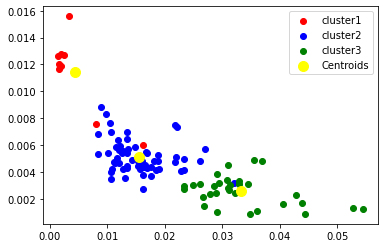

0.42151689178223994

In [18]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')

plt.legend()
plt.show()

from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(vi,np.argmin(EuclidianDistance,axis=1))

[[0.02784    0.00233622 0.0059379  ... 0.0124598  0.00613258 0.00029203]
 [0.036846   0.00478998 0.00221076 ... 0.0073692  0.0073692  0.00294768]
 [0.0526989  0.0012791  0.00358148 ... 0.0112561  0.00562804 0.00025582]
 ...
 [0.0359392  0.00108578 0.00521173 ... 0.0131379  0.00401737 0.00010858]
 [0.0354988  0.00487239 0.00487239 ... 0.00928074 0.0062645  0.00023202]
 [0.0268758  0.00144129 0.00652819 ... 0.0117847  0.00534125 0.00016956]]
(100, 2)


/Users/suhyeonglee/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

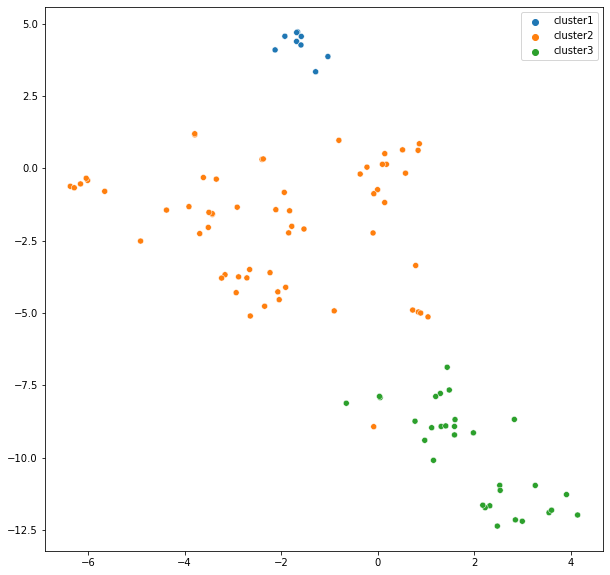

In [19]:
print(Output[3])
data = np.append(Output[1],Output[2],axis=0)
data2 = np.append(data,Output[3],axis=0)

labels  = ["cluster1" for x in range(len(Output[1]))]
labels  += ["cluster2" for x in range(len(Output[2]))]
labels  += ["cluster3" for x in range(len(Output[3]))]
labels = np.array(labels)


tsne = TSNE(n_components=2)
data_2d = tsne.fit_transform(data2)
print(data_2d.shape)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data_2d[:,0], data_2d[:,1], hue=labels)